In [21]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load dataset
data = pd.read_csv('dataset.csv')

# Fill missing values in Age and Salary columns
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Salary'].fillna(data['Salary'].mean(), inplace=True)

# Scale Age and Salary using MinMax and Standard Scalers
data[['Age_MinMax', 'Salary_MinMax']] = MinMaxScaler().fit_transform(data[['Age', 'Salary']])
data[['Age_Standard', 'Salary_Standard']] = StandardScaler().fit_transform(data[['Age', 'Salary']])

# Show the data with new columns
print(data)

   Country        Age        Salary Purchased  Age_MinMax  Salary_MinMax  \
0   France  44.000000  72000.000000        No    0.739130       0.685714   
1    Spain  27.000000  48000.000000       Yes    0.000000       0.000000   
2  Germany  30.000000  54000.000000        No    0.130435       0.171429   
3    Spain  38.000000  61000.000000        No    0.478261       0.371429   
4  Germany  40.000000  63777.777778       Yes    0.565217       0.450794   
5   France  35.000000  58000.000000       Yes    0.347826       0.285714   
6    Spain  38.777778  52000.000000        No    0.512077       0.114286   
7   France  48.000000  79000.000000       Yes    0.913043       0.885714   
8  Germany  50.000000  83000.000000        No    1.000000       1.000000   
9   France  37.000000  67000.000000       Yes    0.434783       0.542857   

   Age_Standard  Salary_Standard  
0      0.758874     7.494733e-01  
1     -1.711504    -1.438178e+00  
2     -1.275555    -8.912655e-01  
3     -0.113024    -2.5

In [15]:
import pandas as pd

# Create dataset
df = pd.DataFrame({
    'Monthly_Bill_Amount': [100, 150, 200, 120, 180],
    'Total_Minutes_of_Usage': [500, 700, 800, 550, 750],
    'Num_Customer_Service_Calls': [3, 5, 2, 4, 6],
    'Contract_Length': [12, 24, 6, 18, 9],
    'Age_of_Customer': [30, 40, 25, 35, 28],
    'Customer_Satisfaction_Score': [4, 3, 5, 2, 4],
    'Churn': [0, 1, 0, 1, 0]
})

# Calculate correlation of each feature with 'Churn'
corr = df.corr()['Churn']
print("Correlation with Churn (>|0.7|):", corr[abs(corr) > 0.7])

# Find pairs of features with high correlation
high_corr_pairs = [(i, j) for i in df.columns for j in df.columns if i != j and abs(df[i].corr(df[j])) > 0.7]
print("Highly Correlated Pairs:", high_corr_pairs)

Correlation with Churn (>|0.7|): Contract_Length                0.909718
Age_of_Customer                0.906513
Customer_Satisfaction_Score   -0.880705
Churn                          1.000000
Name: Churn, dtype: float64
Highly Correlated Pairs: [('Monthly_Bill_Amount', 'Total_Minutes_of_Usage'), ('Total_Minutes_of_Usage', 'Monthly_Bill_Amount'), ('Contract_Length', 'Age_of_Customer'), ('Contract_Length', 'Customer_Satisfaction_Score'), ('Contract_Length', 'Churn'), ('Age_of_Customer', 'Contract_Length'), ('Age_of_Customer', 'Customer_Satisfaction_Score'), ('Age_of_Customer', 'Churn'), ('Customer_Satisfaction_Score', 'Contract_Length'), ('Customer_Satisfaction_Score', 'Age_of_Customer'), ('Customer_Satisfaction_Score', 'Churn'), ('Churn', 'Contract_Length'), ('Churn', 'Age_of_Customer'), ('Churn', 'Customer_Satisfaction_Score')]


Chi-Square Scores:
Monthly_Bill_Amount: 0.4167
Total_Minutes_of_Usage: 0.4167
Num_Customer_Service_Calls: 0.4167
Contract_Length: 3.7500
Age_of_Customer: 3.7500
Customer_Satisfaction_Score: 2.5208


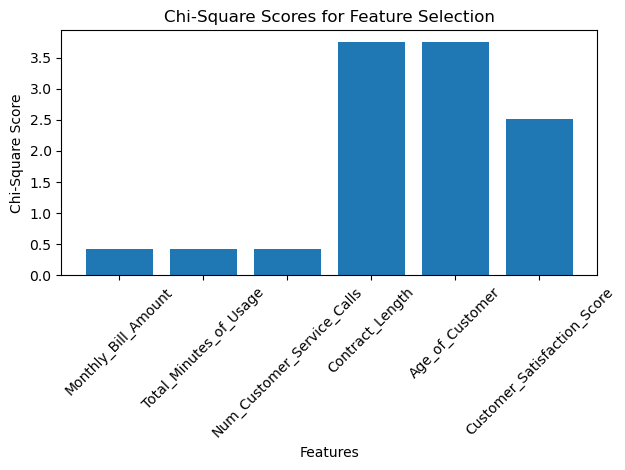

In [18]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt

# Create dataset
df = pd.DataFrame({
    'Monthly_Bill_Amount': [100, 150, 200, 120, 180],
    'Total_Minutes_of_Usage': [500, 700, 800, 550, 750],
    'Num_Customer_Service_Calls': [3, 5, 2, 4, 6],
    'Contract_Length': [12, 24, 6, 18, 9],
    'Age_of_Customer': [30, 40, 25, 35, 28],
    'Customer_Satisfaction_Score': [4, 3, 5, 2, 4],
    'Churn': [0, 1, 0, 1, 0]
})

# Split data into features (X) and target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Encode features for Chi-Square test
X_encoded = OrdinalEncoder().fit_transform(X)

# Calculate Chi-Square scores
chi_scores = SelectKBest(chi2, k='all').fit(X_encoded, y).scores_

# Display Chi-Square scores
print("Chi-Square Scores:")
for feature, score in zip(X.columns, chi_scores):
    print(f"{feature}: {score:.4f}")

# Plot Chi-Square scores
plt.bar(X.columns, chi_scores)
plt.ylabel('Chi-Square Score')
plt.xlabel('Features')
plt.title('Chi-Square Scores for Feature Selection')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Mutual Information Scores:
Monthly_Bill_Amount: 0.4857
Total_Minutes_of_Usage: 0.0000
Num_Customer_Service_Calls: 0.0000
Contract_Length: 0.0041
Age_of_Customer: 0.0387


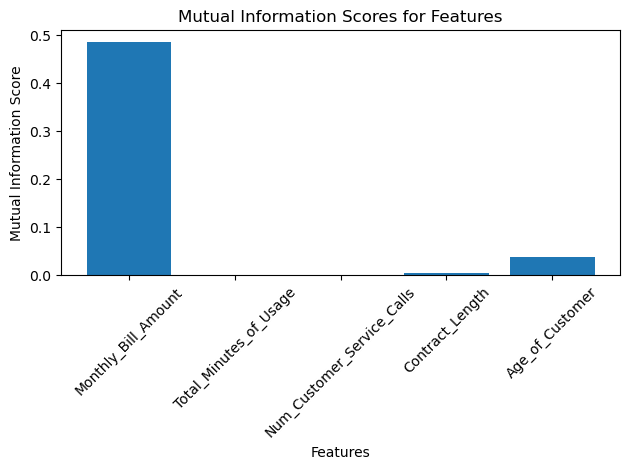

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split

# Generate synthetic dataset
np.random.seed(1)
X = pd.DataFrame({
    'Monthly_Bill_Amount': np.random.randint(100, 200, 100),
    'Total_Minutes_of_Usage': np.random.randint(500, 800, 100),
    'Num_Customer_Service_Calls': np.random.randint(1, 10, 100),
    'Contract_Length': np.random.randint(6, 24, 100),
    'Age_of_Customer': np.random.randint(20, 50, 100)
})

# Create a binary target variable based on Monthly Bill Amount
y = (X['Monthly_Bill_Amount'] > 150).astype(int)

# Split data into training inputs (X) and target (y)
X_train, _, y_train, _ = train_test_split(X, y, test_size=0.33, random_state=1)

# Calculate Mutual Information scores for features
mutual_info_scores = SelectKBest(mutual_info_classif, k='all').fit(X_train, y_train).scores_

# Display Mutual Information Scores
print("Mutual Information Scores:")
for feature, score in zip(X_train.columns, mutual_info_scores):
    print(f"{feature}: {score:.4f}")

# Plot mutual information scores
plt.bar(X_train.columns, mutual_info_scores)
plt.ylabel('Mutual Information Score')
plt.xlabel('Features')
plt.title('Mutual Information Scores for Features')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for x-axis labels
plt.show()

In [9]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

i = load_iris()
X = i.data
y = i.target

knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=3)
sfs.fit(X, y)

SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=3), n_features_to_select=3)

print(i.feature_names, sfs.get_support())
sfs.transform(X).shape

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] [ True False  True  True]


(150, 3)